In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
Dpt_1_2=pd.read_csv("D:/Case Study/Datasets/Dpt_1_2_PV [MConverter.eu].csv")
Enerpos=pd.read_csv("D:/Case Study/Datasets/ENERPOS_PV [MConverter.eu].csv")
Esiroi=pd.read_csv("D:/Case Study/Datasets/ESIROI_PV.csv")
Meteo=pd.read_csv("D:/Case Study/Datasets/Meteo_Terre_Sainte.csv")
Esiroi_load=pd.read_csv("D:/Case Study/Datasets/ESIROI_SEASOI_load.csv")
Load_data=pd.read_csv("D:/Case Study/Datasets/IUT_load (1).csv")

In [5]:
weather_data = pd.read_csv("D:/Case Study/Datasets/Meteo_Terre_Sainte.csv", parse_dates=['datetime'])

In [6]:
# print(Dpt_1_2.dtypes)

In [7]:
weather_data.head(10)

,datetime,GHI,BNI,DHI,DBT,RH,Ws10,Wd10,Patmo,Rainfall
0,2021-01-01 00:10:00+04:00,0.0,0.0,0.0,24.483,76.639,3.6342,88.251,1016.0,0.0
1,2021-01-01 00:20:00+04:00,0.0,0.0,0.0,24.326,76.643,2.6304,94.150,1016.0,0.0
2,2021-01-01 00:30:00+04:00,0.0,0.0,0.0,24.323,79.032,4.3087,102.680,1016.0,0.0
3,2021-01-01 00:40:00+04:00,0.0,0.0,0.0,24.044,80.220,3.5490,101.469,1016.0,0.0
4,2021-01-01 00:50:00+04:00,0.0,0.0,0.0,23.858,78.964,2.8860,96.139,1016.0,0.0
5,2021-01-01 01:00:00+04:00,0.0,0.0,0.0,24.158,75.921,2.7326,98.050,1016.0,0.0
6,2021-01-01 01:10:00+04:00,0.0,0.0,0.0,24.367,75.704,2.9312,105.680,1016.0,0.0
7,2021-01-01 01:20:00+04:00,0.0,0.0,0.0,24.379,77.481,3.8905,108.150,1016.0,0.0
8,2021-01-01 01:30:00+04:00,0.0,0.0,0.0,24.293,80.493,2.9439,100.840,1015.6,0.0
9,2021-01-01 01:40:00+04:00,0.0,0.0,0.0,23.867,75.700,3.7057,97.060,1015.0,0.0


In [8]:
print(Dpt_1_2.head(5))
print(Enerpos.head(5))
print(Esiroi.head(5))
print(Meteo.head(5))
print(Esiroi_load.head(5))
print(Load_data.head(5))

                    datetime   Prod_kW
0  2021-01-01 00:10:00+04:00 -0.002254
1  2021-01-01 00:20:00+04:00 -0.002254
2  2021-01-01 00:30:00+04:00 -0.002254
3  2021-01-01 00:40:00+04:00 -0.002254
4  2021-01-01 00:50:00+04:00 -0.002254
                    datetime  Prod_kW
0  2021-01-01 00:10:00+04:00     -0.0
1  2021-01-01 00:20:00+04:00     -0.0
2  2021-01-01 00:30:00+04:00     -0.0
3  2021-01-01 00:40:00+04:00     -0.0
4  2021-01-01 00:50:00+04:00     -0.0
                    datetime   Prod_kW
0  2021-01-01 00:10:00+04:00 -0.022572
1  2021-01-01 00:20:00+04:00 -0.022572
2  2021-01-01 00:30:00+04:00 -0.022572
3  2021-01-01 00:40:00+04:00 -0.022572
4  2021-01-01 00:50:00+04:00 -0.022572
                    datetime  GHI  BNI  DHI     DBT      RH    Ws10     Wd10  \
0  2021-01-01 00:10:00+04:00  0.0  0.0  0.0  24.483  76.639  3.6342   88.251   
1  2021-01-01 00:20:00+04:00  0.0  0.0  0.0  24.326  76.643  2.6304   94.150   
2  2021-01-01 00:30:00+04:00  0.0  0.0  0.0  24.323  79.032  4.3

In [9]:
Dpt_1_2['datetime'] = pd.to_datetime(Dpt_1_2['datetime'])
Enerpos['datetime'] = pd.to_datetime(Enerpos['datetime'])
Esiroi['datetime'] = pd.to_datetime(Esiroi['datetime'])
Meteo['datetime'] = pd.to_datetime(Meteo['datetime'])
Esiroi_load['datetime'] = pd.to_datetime(Esiroi_load['datetime'])
Load_data['datetime'] = pd.to_datetime(Load_data['datetime'])

In [10]:
# Check for negative PV production values
print(Dpt_1_2[Dpt_1_2['Prod_kW'] < 0])
print(Enerpos[Enerpos['Prod_kW'] < 0])
print(Esiroi[Esiroi['Prod_kW'] < 0])

                        datetime   Prod_kW
0      2021-01-01 00:10:00+04:00 -0.002254
1      2021-01-01 00:20:00+04:00 -0.002254
2      2021-01-01 00:30:00+04:00 -0.002254
3      2021-01-01 00:40:00+04:00 -0.002254
4      2021-01-01 00:50:00+04:00 -0.002254
...                          ...       ...
105115 2022-12-31 23:20:00+04:00 -0.002254
105116 2022-12-31 23:30:00+04:00 -0.002254
105117 2022-12-31 23:40:00+04:00 -0.002254
105118 2022-12-31 23:50:00+04:00 -0.002254
105119 2023-01-01 00:00:00+04:00 -0.002254

[53826 rows x 2 columns]
                        datetime   Prod_kW
1043   2021-01-08 06:00:00+04:00 -0.008339
1688   2021-01-12 17:30:00+04:00 -0.008006
2772   2021-01-20 06:10:00+04:00 -0.005805
2993   2021-01-21 19:00:00+04:00 -0.010354
3204   2021-01-23 06:10:00+04:00 -0.014102
...                          ...       ...
98318  2022-11-14 18:30:00+04:00 -0.001515
99468  2022-11-22 18:10:00+04:00 -0.006266
99903  2022-11-25 18:40:00+04:00 -0.014205
101632 2022-12-07 18:50:00+0

In [11]:
# # Set negative PV production values to zero
# Dpt_1_2.loc[Dpt_1_2['Prod_kW'] <= 0, 'Prod_kW'] = 0
# Enerpos.loc[Enerpos['Prod_kW'] <= 0, 'Prod_kW'] = 0
# Esiroi.loc[Esiroi['Prod_kW'] <= 0, 'Prod_kW'] = 0

In [12]:
for name, df in [('Esiroi', Esiroi), ('Enerpos', Enerpos), ('Dpt_1_2', Dpt_1_2)]:
    print(f"\n{name} Summary Statistics:")
    print(df.describe())


Esiroi Summary Statistics:
             Prod_kW
count  105120.000000
mean       20.531238
std        28.489922
min        -0.022572
25%        -0.022572
50%         0.171781
75%        40.136452
max       100.980000

Enerpos Summary Statistics:
             Prod_kW
count  105120.000000
mean        8.328260
std        11.586614
min        -0.021915
25%        -0.000000
50%        -0.000000
75%        16.320237
max        44.851950

Dpt_1_2 Summary Statistics:
             Prod_kW
count  105120.000000
mean        1.904464
std         2.645406
min        -0.005061
25%        -0.002254
50%        -0.002254
75%         3.771819
max         9.354565


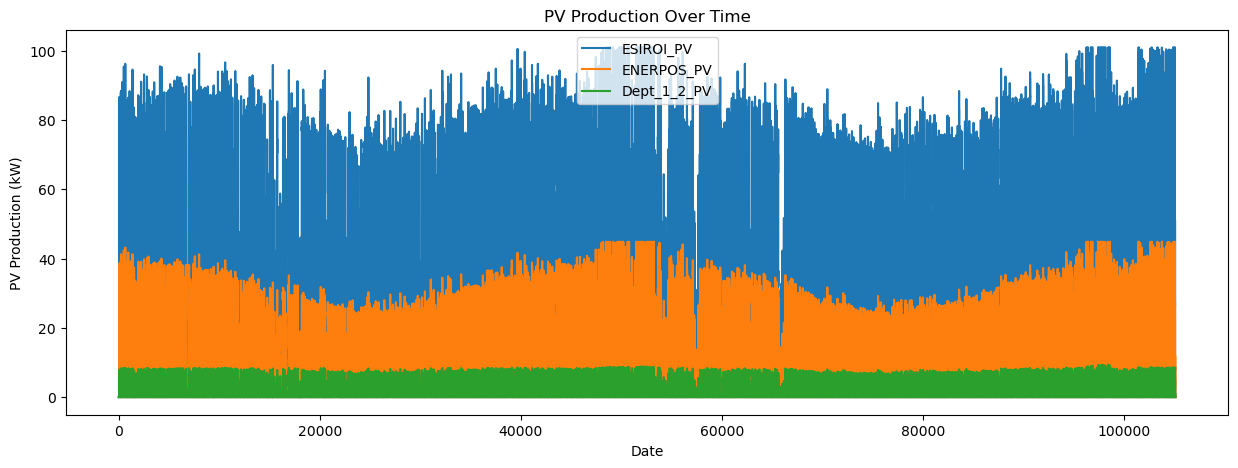

In [14]:
plt.figure(figsize=(15, 5))
for name, df in [('ESIROI_PV', Esiroi), ('ENERPOS_PV', Enerpos), ('Dept_1_2_PV', Dpt_1_2)]:
    plt.plot(df.index, df['Prod_kW'], label=name)
plt.title('PV Production Over Time')
plt.xlabel('Date')
plt.ylabel('PV Production (kW)')
plt.legend()
plt.show()

In [17]:
pv_data = pd.merge(Dpt_1_2, Enerpos, on='datetime', how='outer', suffixes=('_dpt', '_enerpos'))
pv_data = pd.merge(pv_data, Esiroi, on='datetime', how='outer', suffixes=('', '_esiroi'))
loaddata = pd.merge(Load_data, Esiroi_load, on='datetime', how='outer')

merged_data = pd.merge(pv_data, loaddata, on='datetime', how='outer')


# merged_data.columns = ['datetime', 'Prod_kW_dpt', 'Prod_kW_enerpos', 'Prod_kW_esiroi', 'Dpt_1_2', 'Dpt_3_4', 'ENERPOS', 'ESIROI_SEASOI','Total']

merged_data = merged_data.loc[:, ~merged_data.columns.duplicated()]

In [94]:
merged_data_weather = pd.merge(pv_data, weather_data, on='datetime')

In [95]:
merged_data_weather.head(10)

,datetime,Prod_kW_dpt,Prod_kW_enerpos,Prod_kW,GHI,BNI,DHI,DBT,RH,Ws10,Wd10,Patmo,Rainfall
0,2021-01-01 00:10:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,24.483,76.639,3.6342,88.251,1016.0,0.0
1,2021-01-01 00:20:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,24.326,76.643,2.6304,94.150,1016.0,0.0
2,2021-01-01 00:30:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,24.323,79.032,4.3087,102.680,1016.0,0.0
3,2021-01-01 00:40:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,24.044,80.220,3.5490,101.469,1016.0,0.0
4,2021-01-01 00:50:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,23.858,78.964,2.8860,96.139,1016.0,0.0
5,2021-01-01 01:00:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,24.158,75.921,2.7326,98.050,1016.0,0.0
6,2021-01-01 01:10:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,24.367,75.704,2.9312,105.680,1016.0,0.0
7,2021-01-01 01:20:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,24.379,77.481,3.8905,108.150,1016.0,0.0
8,2021-01-01 01:30:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,24.293,80.493,2.9439,100.840,1015.6,0.0
9,2021-01-01 01:40:00+04:00,-0.002254,-0.0,-0.022572,0.0,0.0,0.0,23.867,75.700,3.7057,97.060,1015.0,0.0


In [18]:
merged_data.head(10)

,datetime,Prod_kW_dpt,Prod_kW_enerpos,Prod_kW,Dpt_1_2,ENERPOS,ESIROI_SEASOI
0,2021-01-01 00:10:00+04:00,-0.002254,-0.0,-0.022572,19.0,0.0,33
1,2021-01-01 00:20:00+04:00,-0.002254,-0.0,-0.022572,16.0,1.0,33
2,2021-01-01 00:30:00+04:00,-0.002254,-0.0,-0.022572,10.0,0.0,34
3,2021-01-01 00:40:00+04:00,-0.002254,-0.0,-0.022572,27.0,0.0,33
4,2021-01-01 00:50:00+04:00,-0.002254,-0.0,-0.022572,13.0,0.0,29
5,2021-01-01 01:00:00+04:00,-0.002254,-0.0,-0.022572,13.0,0.0,28
6,2021-01-01 01:10:00+04:00,-0.002254,-0.0,-0.022572,17.0,1.0,30
7,2021-01-01 01:20:00+04:00,-0.002254,-0.0,-0.022572,20.0,1.0,32
8,2021-01-01 01:30:00+04:00,-0.002254,-0.0,-0.022572,17.0,0.0,33
9,2021-01-01 01:40:00+04:00,-0.002254,-0.0,-0.022572,6.0,1.0,31


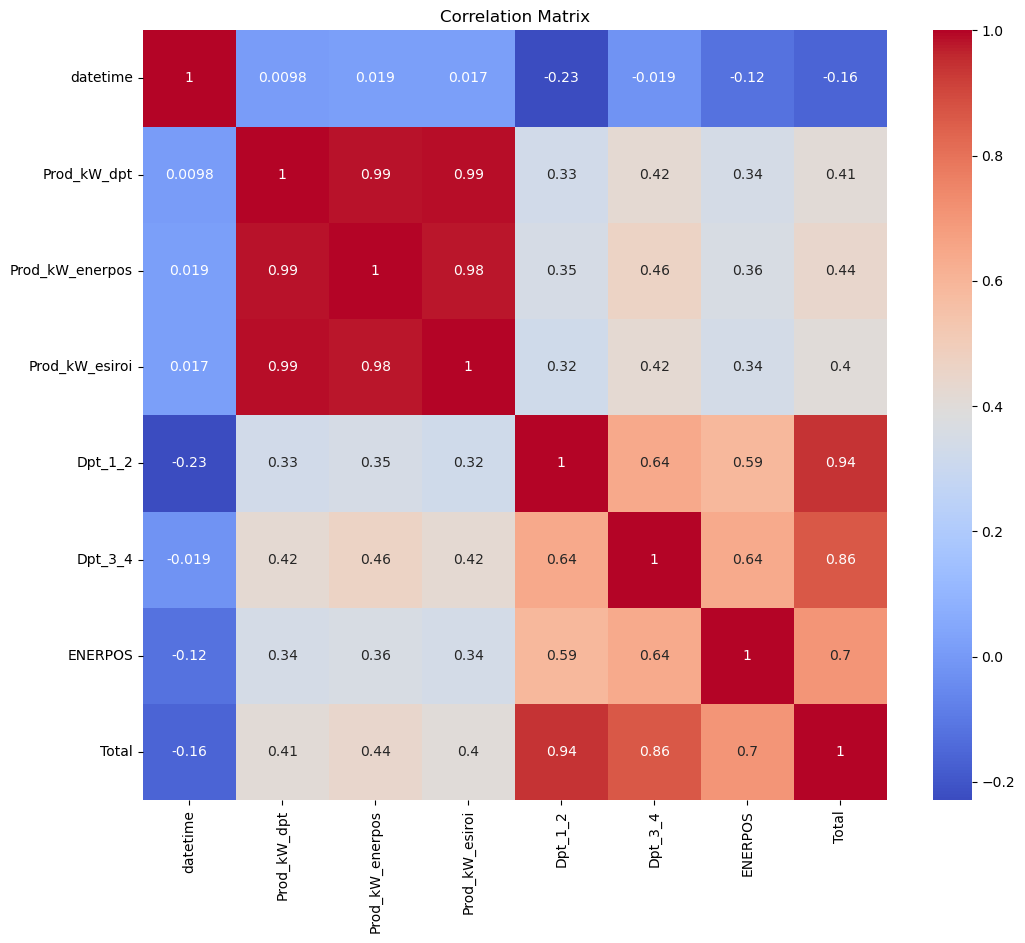

In [97]:
#Correlation analysis between PV and load data

correlation_matrix = merged_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

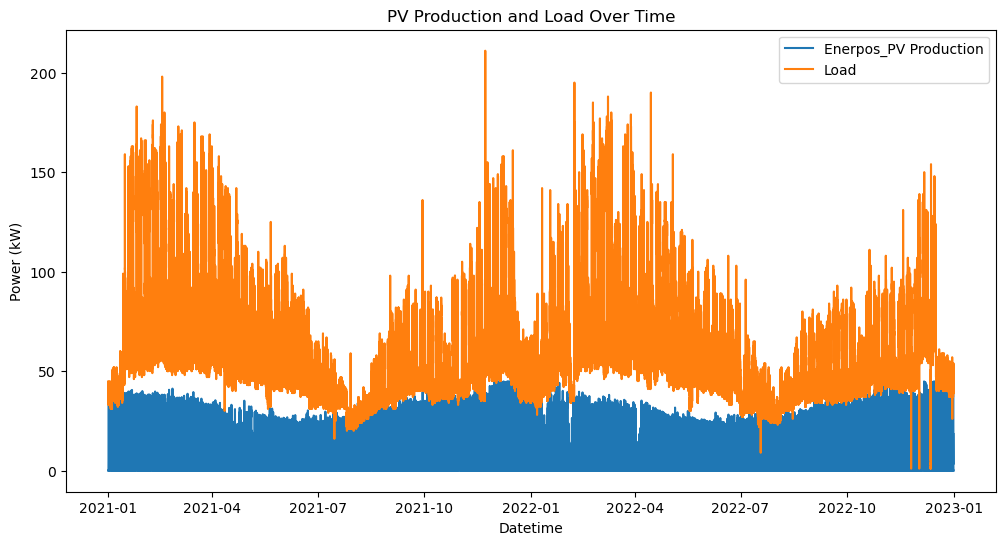

In [98]:
plt.figure(figsize=(12, 6))
# plt.plot(merged_data['datetime'], merged_data['Prod_kW_dpt'], label='Dpt_1_2_PV Production')
plt.plot(merged_data['datetime'], merged_data['Prod_kW_enerpos'], label='Enerpos_PV Production')
# plt.plot(merged_data['datetime'], merged_data['Prod_kW_esiroi'], label='Esiroi_PV Production')
plt.plot(merged_data['datetime'], merged_data['Total'], label='Load')
plt.xlabel('Datetime')
plt.ylabel('Power (kW)')
plt.title('PV Production and Load Over Time')
plt.legend()
plt.show()

In [19]:
#Gap analysis between Load and PV production

merged_data['gap_dpt'] = merged_data['Dpt_1_2'] - merged_data['Prod_kW_dpt']
merged_data['gap_enerpos'] = merged_data['ENERPOS'] - merged_data['Prod_kW_enerpos']
merged_data['gap_esiroi'] = merged_data['ESIROI_SEASOI'] - merged_data['Prod_kW']

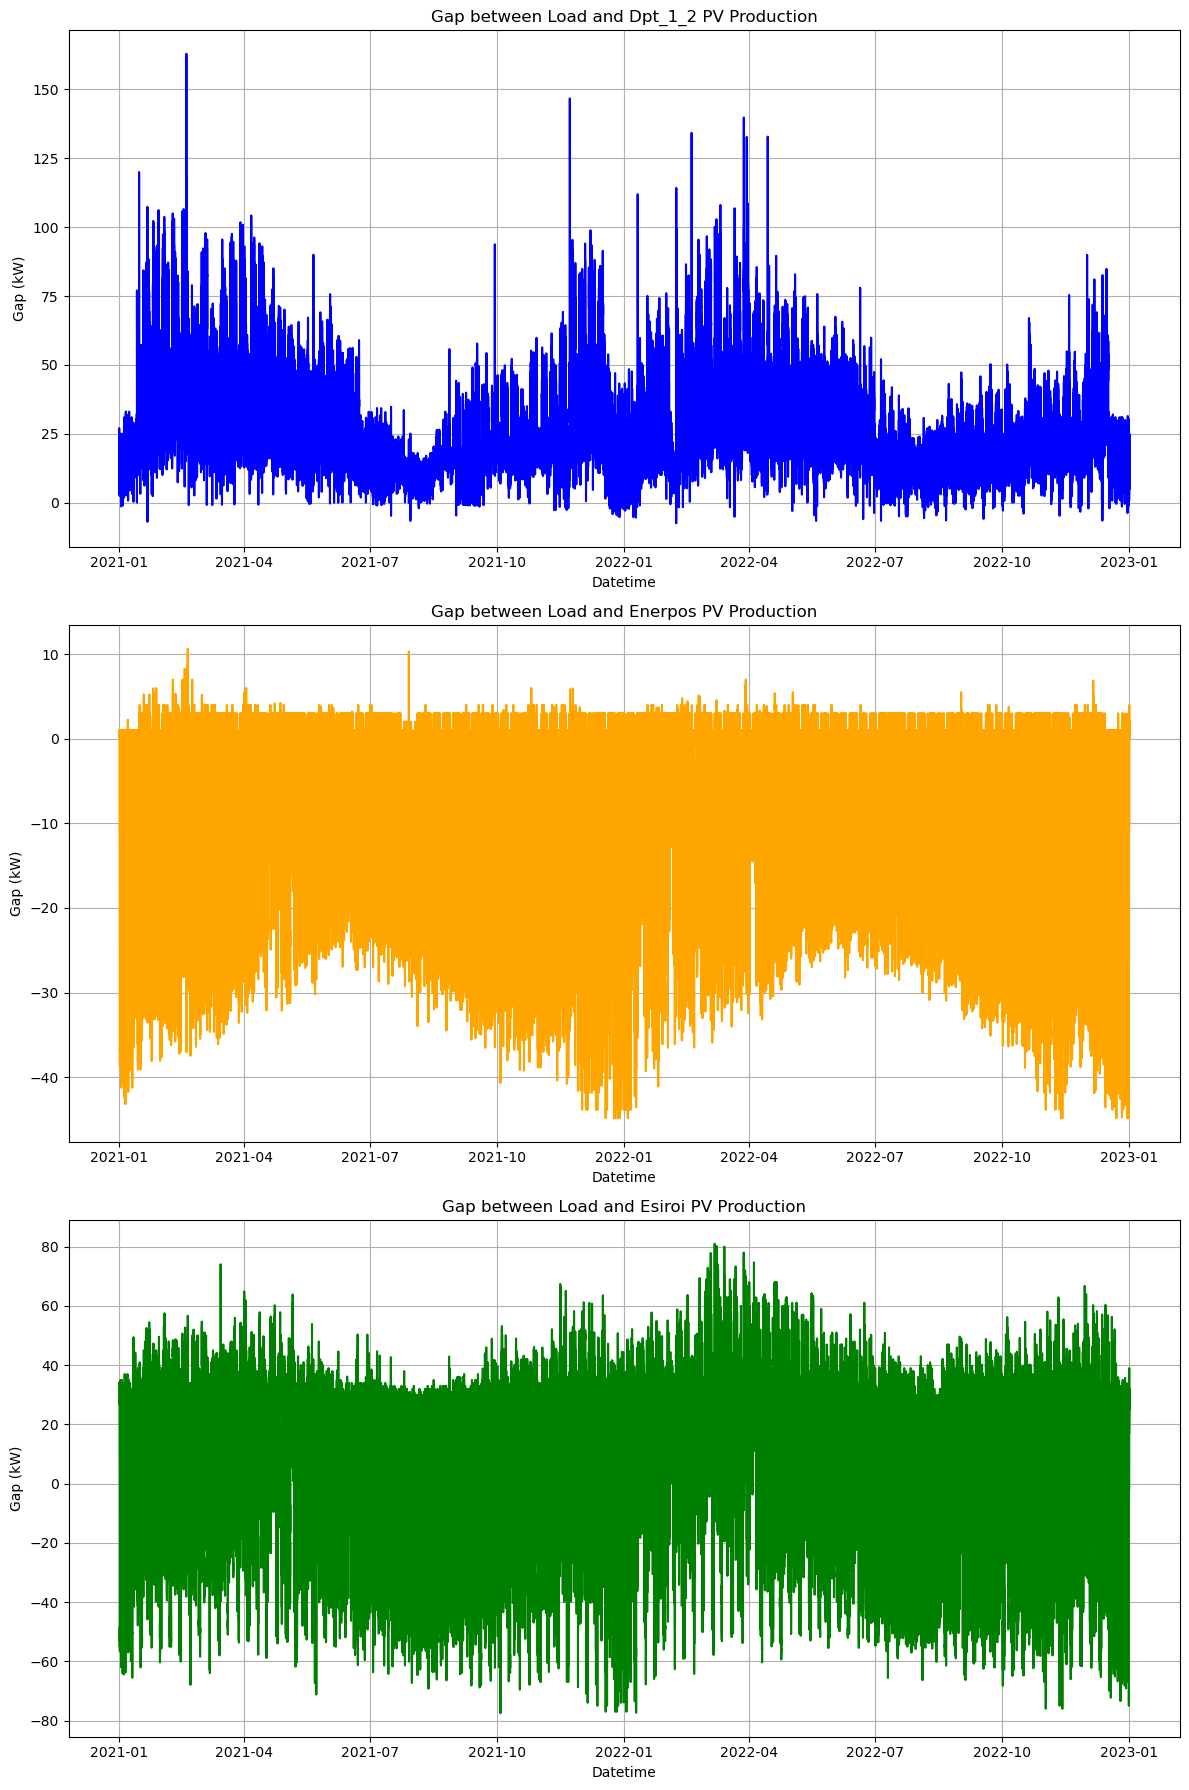

In [21]:
# Step 2: Create subplots for each gap
fig, axs = plt.subplots(3, 1, figsize=(12, 18))  # 3 rows, 1 column

# Plot for Gap Dpt_1_2_PV
axs[0].plot(merged_data['datetime'], merged_data['gap_dpt'], color='blue')
axs[0].set_title('Gap between Load and Dpt_1_2 PV Production')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('Gap (kW)')
axs[0].grid()

# Plot for Gap Enerpos_PV
axs[1].plot(merged_data['datetime'], merged_data['gap_enerpos'], color='orange')
axs[1].set_title('Gap between Load and Enerpos PV Production')
axs[1].set_xlabel('Datetime')
axs[1].set_ylabel('Gap (kW)')
axs[1].grid()

# Plot for Gap Esiroi_PV
axs[2].plot(merged_data['datetime'], merged_data['gap_esiroi'], color='green')
axs[2].set_title('Gap between Load and Esiroi PV Production')
axs[2].set_xlabel('Datetime')
axs[2].set_ylabel('Gap (kW)')
axs[2].grid()

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

### As per the Gap analysis , it shows positive mean energy gapsin Dpt_1_2 indicating Load exceeds the PV production. For Enerpos it shows almost negative mean energy indicating it overproduces while the Esiroi is balanced with both over and underproduction.

In [101]:
#Production analysis of each PV building

for name, df in [('ESIROI_PV', esiroi_pv), ('ENERPOS_PV', enerpos_pv), ('Dept_1_2_PV', dept_1_2_pv)]:
    print(f"\n{name} Production Analysis:")
    print(f"Highest production: {df['Prod_kW'].max()} kW at {df['Prod_kW'].idxmax()}")
    print(f"Lowest production: {df['Prod_kW'].min()} kW at {df['Prod_kW'].idxmin()}")
    print("Average production by month:")
    print(df.groupby('Month')['Prod_kW'].mean().sort_values(ascending=False))


ESIROI_PV Production Analysis:
Highest production: 100.98 kW at 2021-12-04 12:20:00+04:00
Lowest production: -0.022572 kW at 2021-01-01 00:10:00+04:00
Average production by month:
Month
12    24.330315
11    24.159921
9     22.272542
1     22.100913
10    21.641598
3     21.072330
2     20.704965
8     19.455123
5     18.502274
7     18.500175
4     16.820000
6     16.763483
Name: Prod_kW, dtype: float64

ENERPOS_PV Production Analysis:
Highest production: 44.85195 kW at 2021-12-01 12:20:00+04:00
Lowest production: -0.0219147921310946 kW at 2021-04-14 16:40:00+04:00
Average production by month:
Month
12    11.388644
11    10.897635
1     10.153695
10     9.156411
2      9.042501
9      8.858400
3      8.572294
8      7.124860
4      6.395725
5      6.389491
7      6.279255
6      5.702260
Name: Prod_kW, dtype: float64

Dept_1_2_PV Production Analysis:
Highest production: 9.354565185241508 kW at 2022-11-15 12:10:00+04:00
Lowest production: -0.005061000289842 kW at 2022-09-24 06:20:00+0

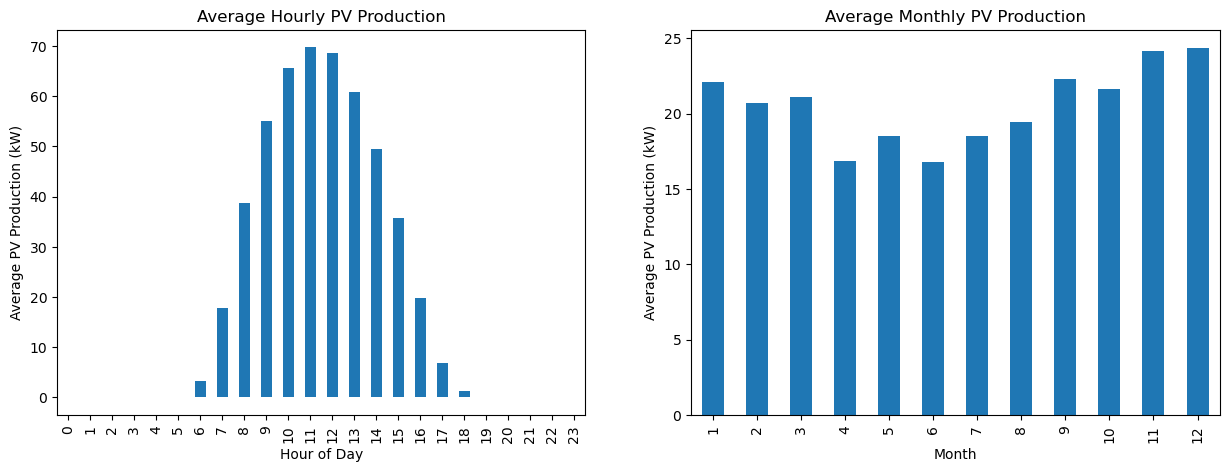

In [102]:
# Daily and monthly patterns
merged_data_weather['hour'] = merged_data_weather['datetime'].dt.hour
merged_data_weather['month'] = merged_data_weather['datetime'].dt.month

hourly_production = merged_data_weather.groupby('hour')['Prod_kW'].mean()
monthly_production = merged_data_weather.groupby('month')['Prod_kW'].mean()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
hourly_production.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Hour of Day')
ax1.set_ylabel('Average PV Production (kW)')
ax1.set_title('Average Hourly PV Production')

monthly_production.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Month')
ax2.set_ylabel('Average PV Production (kW)')
ax2.set_title('Average Monthly PV Production')
plt.show()

### From the PV production analysis of the three department the most PV production happens in Esiroi followed by Enerpos and Dpt_1_2. Also the months when the most pV production is observed is usually at the end of the year, November December and January as the Island follows warm and humid season from November to April.

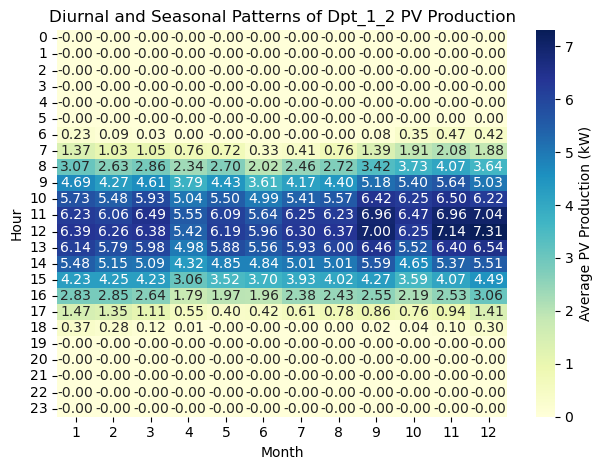

In [104]:
# Diurnal and Seasonal Patterns
sns.heatmap(Dpt_1_2.groupby([Dpt_1_2['datetime'].dt.hour, Dpt_1_2['datetime'].dt.month])['Prod_kW'].mean().unstack(),
            cmap='YlGnBu', annot=True, fmt='.2f', cbar_kws={'label': 'Average PV Production (kW)'})
plt.xlabel('Month')
plt.ylabel('Hour')
plt.title('Diurnal and Seasonal Patterns of Dpt_1_2 PV Production')
plt.tight_layout()
plt.show()

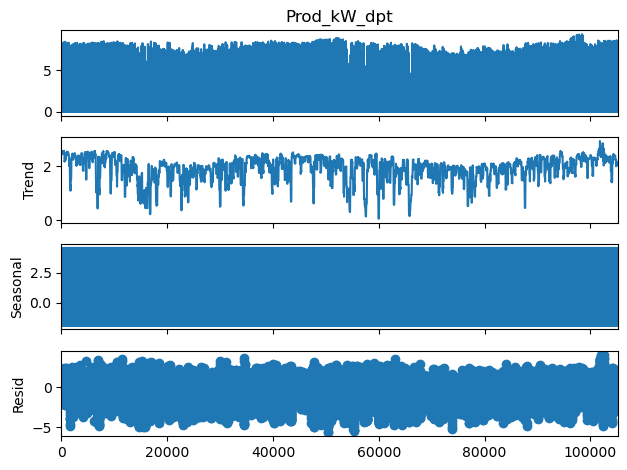

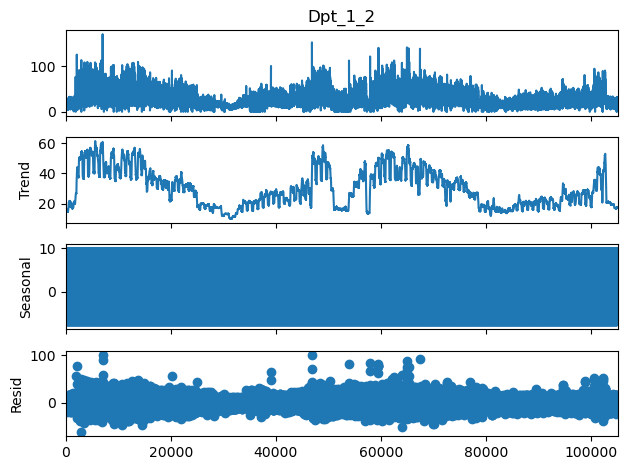

In [105]:
def time_series_decomposition(data, column):
    data_cleaned = data.dropna(subset=[column])
    result = seasonal_decompose(data_cleaned[column], model='additive', period=144)
    result.plot()
    plt.show()

time_series_decomposition(merged_data, 'Prod_kW_dpt')
time_series_decomposition(merged_data, 'Dpt_1_2')

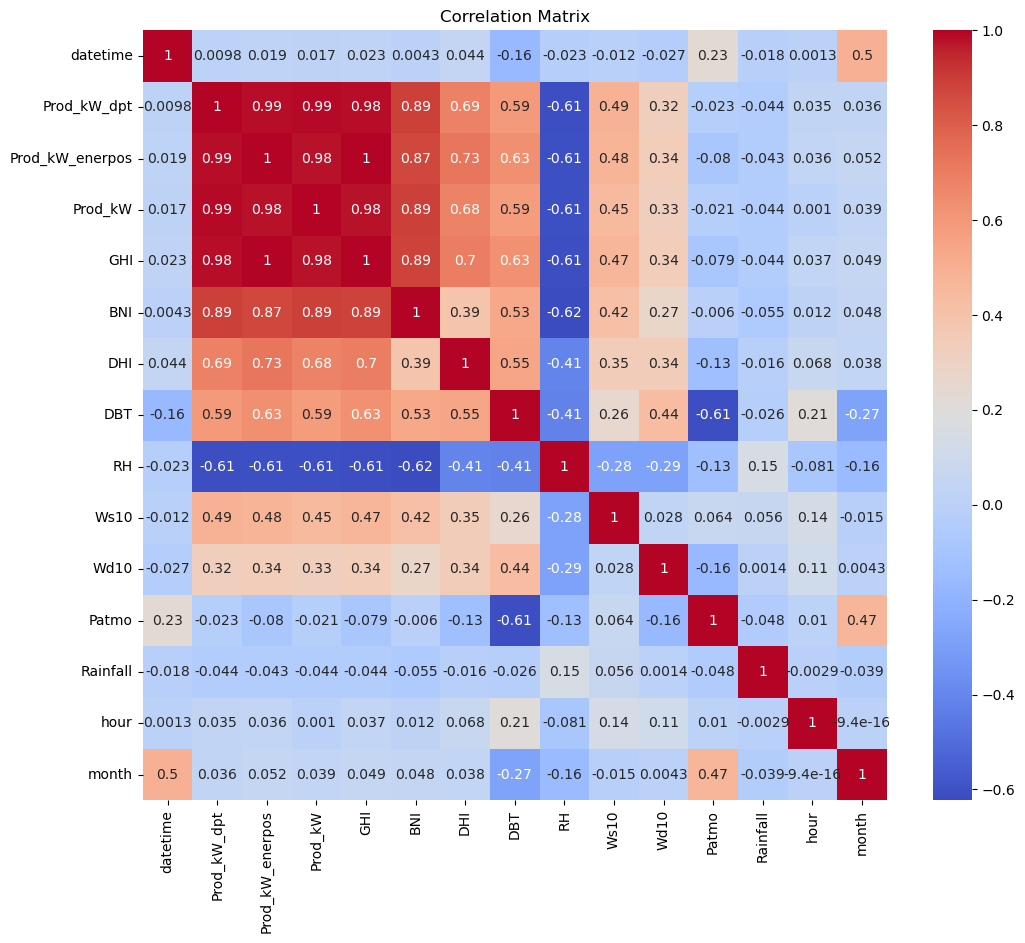

In [106]:
# Correlation matrix between weather and PV data
correlation_matrix = merged_data_weather.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


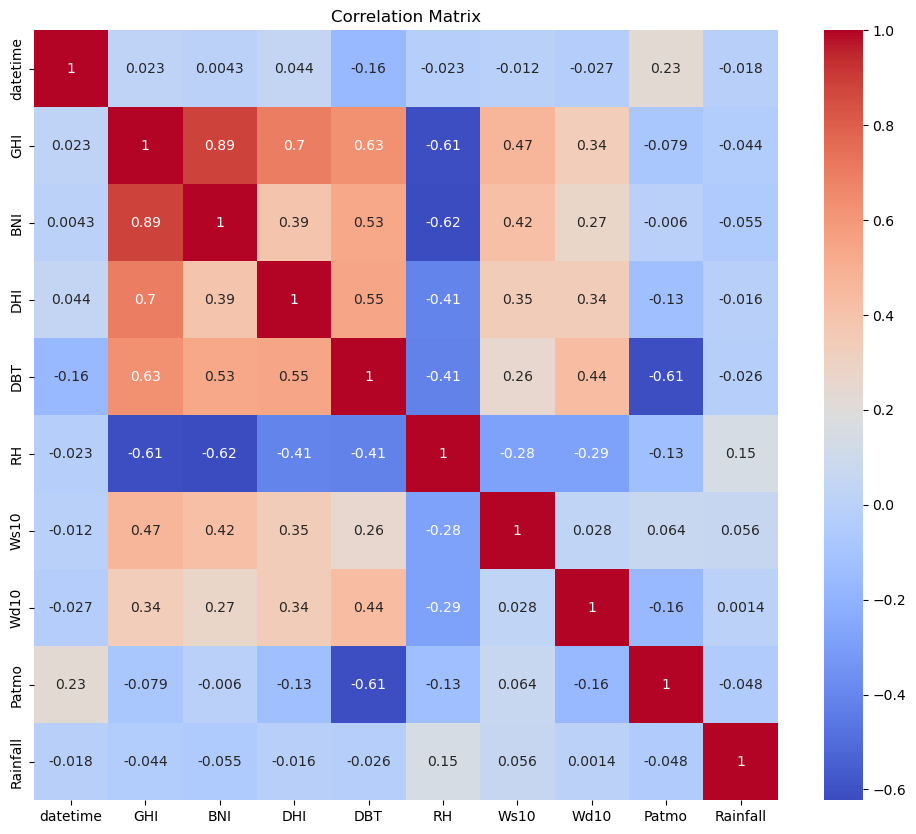

In [22]:
correlation_matrix = Meteo.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

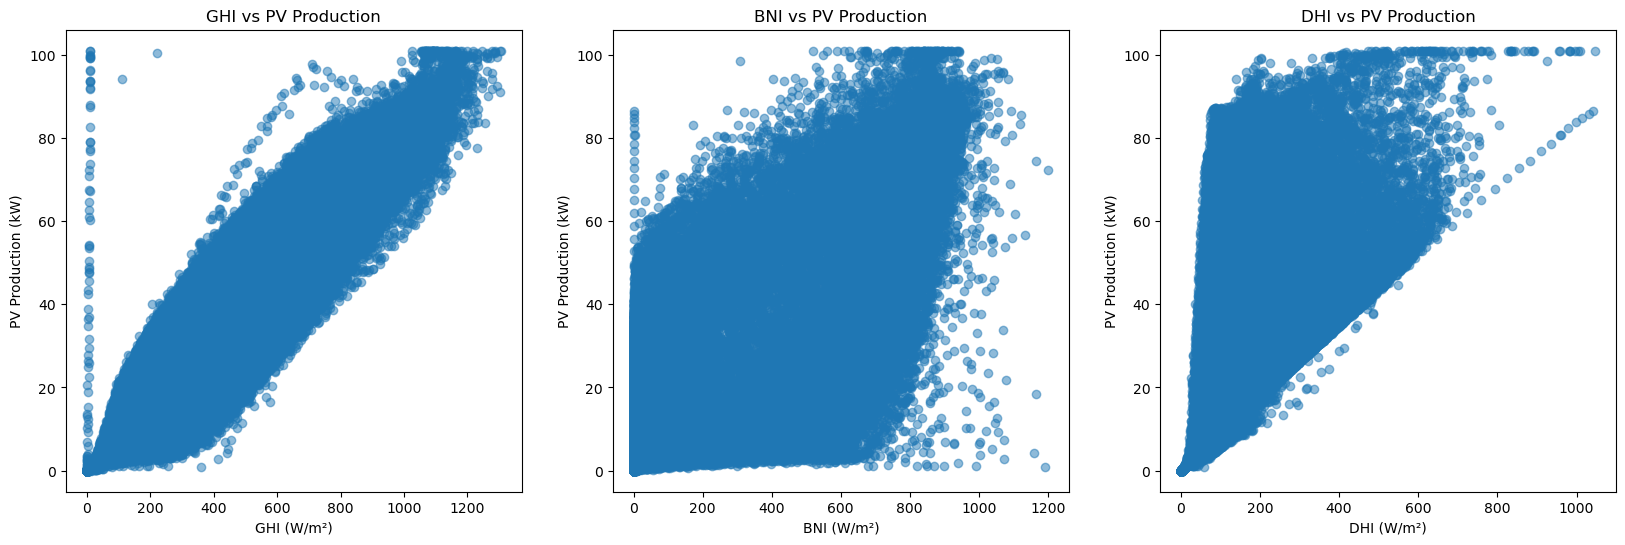

In [107]:
# Scatter plots of GHI, BNI, DHI vs PV Production
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
axs[0].scatter(merged_data_weather['GHI'], merged_data_weather['Prod_kW'], alpha=0.5)
axs[0].set_xlabel('GHI (W/m²)')
axs[0].set_ylabel('PV Production (kW)')
axs[0].set_title('GHI vs PV Production')

axs[1].scatter(merged_data_weather['BNI'], merged_data_weather['Prod_kW'], alpha=0.5)
axs[1].set_xlabel('BNI (W/m²)')
axs[1].set_ylabel('PV Production (kW)')
axs[1].set_title('BNI vs PV Production')

axs[2].scatter(merged_data_weather['DHI'], merged_data_weather['Prod_kW'], alpha=0.5)
axs[2].set_xlabel('DHI (W/m²)')
axs[2].set_ylabel('PV Production (kW)')
axs[2].set_title('DHI vs PV Production')
plt.show()

### As for the weather data, the most influencing factors in the PV production is mainly GHI, BNI and DHI where GHI shows the highest correlation with PV production data. The strong correlation of BNI also indicated the importance of direct sunlight for the efficiency of system. The moderate correlation of DHI highlighted the ability of system to generate power under diffused light conditions. Also these three parameters follow close relationship between each other {GHI = DHI + BNI * cos(θ), where θ is the solar zenith angle}